<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Raw-returns" data-toc-modified-id="Raw-returns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Raw returns</a></span><ul class="toc-item"><li><span><a href="#Equal-weighted-(EW)-portfolios" data-toc-modified-id="Equal-weighted-(EW)-portfolios-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equal-weighted (EW) portfolios</a></span></li><li><span><a href="#Value-weighted-(VW)-portfolios" data-toc-modified-id="Value-weighted-(VW)-portfolios-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Value-weighted (VW) portfolios</a></span></li></ul></li><li><span><a href="#Risk-adjusted-performance" data-toc-modified-id="Risk-adjusted-performance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Risk-adjusted performance</a></span><ul class="toc-item"><li><span><a href="#Equal-weighted-portfolios" data-toc-modified-id="Equal-weighted-portfolios-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Equal-weighted portfolios</a></span></li><li><span><a href="#Value-weighted-portfolios" data-toc-modified-id="Value-weighted-portfolios-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Value-weighted portfolios</a></span></li></ul></li></ul></div>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_datareader as pdr

# Raw returns

## Equal-weighted (EW) portfolios

In [2]:
# Load EW return data data
ew_ret = pd.read_pickle('../data/AG_ew_returns.zip')
ew_ret = ew_ret[:'2003-06'].copy()
ew_ret

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
mdate,,,,,,,,,,,
1982-07,-0.003948,-0.011054,0.002117,-0.009741,-0.009275,-0.003169,-0.004816,-0.006250,-0.034018,-0.071587,0.067639
1982-08,0.043106,0.058108,0.067768,0.071293,0.070272,0.076378,0.080404,0.078438,0.076014,0.069051,-0.025945
1982-09,0.037267,0.034962,0.034323,0.037597,0.034146,0.047353,0.034485,0.030422,0.009593,-0.020953,0.058220
1982-10,0.154922,0.122708,0.106485,0.107380,0.119641,0.122316,0.112235,0.135088,0.142025,0.161400,-0.006478
1982-11,0.116354,0.115989,0.096393,0.089470,0.069214,0.090190,0.091515,0.082948,0.097205,0.050597,0.065757
...,...,...,...,...,...,...,...,...,...,...,...
2003-02,-0.019734,0.001625,-0.026126,-0.034833,-0.045058,-0.039061,-0.032196,-0.026197,-0.034444,-0.034851,0.015116
2003-03,0.055259,0.031098,0.013882,0.006659,0.009049,0.012072,0.008408,0.014281,0.005784,0.009986,0.045273
2003-04,0.148508,0.140660,0.123251,0.112512,0.095413,0.092639,0.085307,0.109632,0.085932,0.127671,0.020836


In [3]:
# Calculate average EW returns
ew_means = ew_ret.mean()
ew_means

portf_nr
1.0       0.022429
2.0       0.019655
3.0       0.017927
4.0       0.015500
5.0       0.014881
6.0       0.014966
7.0       0.013576
8.0       0.012631
9.0       0.008677
10.0      0.001652
Spread    0.020777
dtype: float64

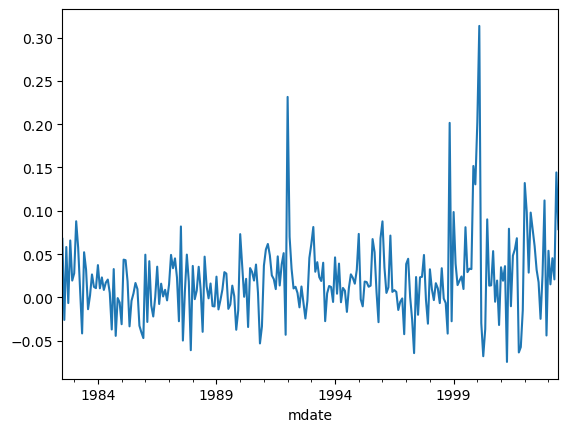

In [4]:
# Plot returns of Spread portfolio
ew_ret['Spread'].plot();

In [5]:
# Calculate t-statistics for each portfolio returns (H0: average portfolio return is 0)
ew_tstats = ew_means / (ew_ret.std() / ew_ret.count()**0.5)
ew_tstats

portf_nr
1.0       3.760509
2.0       4.443625
3.0       5.114522
4.0       5.082020
5.0       4.975837
6.0       4.765637
7.0       4.130154
8.0       3.400974
9.0       2.047683
10.0      0.325883
Spread    7.035854
dtype: float64

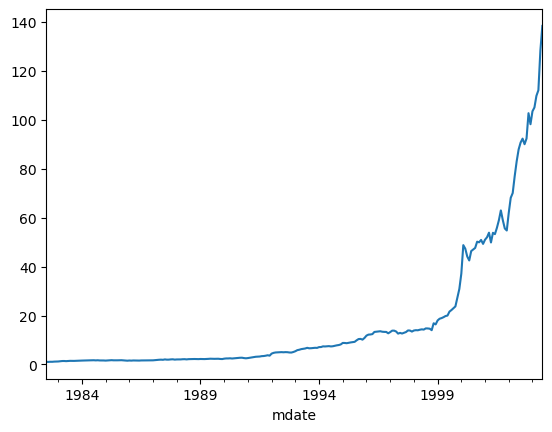

In [6]:
# Plot cummulative return of spread portfolio
(1 + ew_ret)['Spread'].cumprod().plot();

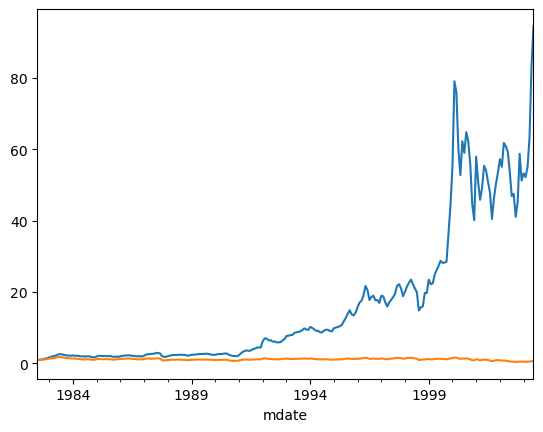

In [7]:
# Plot cummulative return of portfolios 1 and 10
(1+ew_ret)[1].cumprod().plot();
(1+ew_ret)[10].cumprod().plot();

## Value-weighted (VW) portfolios

In [8]:
# Load VW return data data
vw_ret = pd.read_pickle('../data/AG_vw_returns.zip')
vw_ret = vw_ret[:'2003-06'].copy()
vw_ret

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
mdate,,,,,,,,,,,
1982-07,-0.016496,-0.032506,-0.008927,-0.020168,-0.008148,-0.014216,-0.016144,-0.026691,-0.052065,-0.063027,0.046531
1982-08,0.112879,0.126619,0.133671,0.111961,0.122147,0.108101,0.125463,0.129065,0.111937,0.149069,-0.036190
1982-09,0.035342,-0.011639,0.009310,0.021978,0.013155,0.008232,0.015515,0.021661,0.006081,-0.006955,0.042297
1982-10,0.180624,0.147793,0.118260,0.096087,0.082554,0.109715,0.099294,0.108276,0.163611,0.183572,-0.002948
1982-11,0.075535,0.093501,0.050342,0.041856,0.039193,0.049904,0.040065,0.032300,0.074103,0.070121,0.005414
...,...,...,...,...,...,...,...,...,...,...,...
2003-02,0.013984,-0.000944,-0.012868,-0.007327,-0.035330,-0.029244,-0.015190,-0.005070,-0.002535,-0.009106,0.023090
2003-03,0.039739,0.007937,-0.010142,-0.014830,0.008708,0.016905,-0.013148,0.030607,0.045923,0.003247,0.036492
2003-04,0.136213,0.078133,0.103938,0.091120,0.065227,0.060584,0.080776,0.078677,0.054610,0.089784,0.046430


In [9]:
# Calculate average EW returns
vw_means = vw_ret.mean()
vw_means

portf_nr
1.0       0.014354
2.0       0.013263
3.0       0.013213
4.0       0.013390
5.0       0.011904
6.0       0.012645
7.0       0.013343
8.0       0.012511
9.0       0.010194
10.0      0.006706
Spread    0.007648
dtype: float64

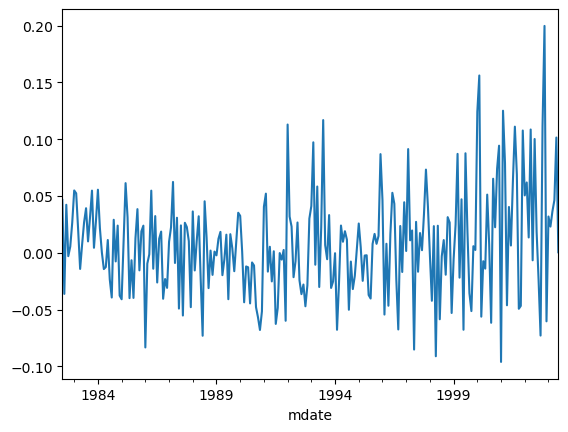

In [10]:
# Plot returns of Spread portfolio
vw_ret['Spread'].plot();

In [11]:
# Calculate t-statistics for each portfolio returns (H0: average portfolio return is 0)
vw_tstats = vw_means / (vw_ret.std() / vw_ret.count()**0.5)
vw_tstats

portf_nr
1.0       3.473671
2.0       3.927155
3.0       4.702159
4.0       5.177343
5.0       4.574888
6.0       4.439000
7.0       4.407662
8.0       3.497476
9.0       2.501369
10.0      1.531934
Spread    2.654032
dtype: float64

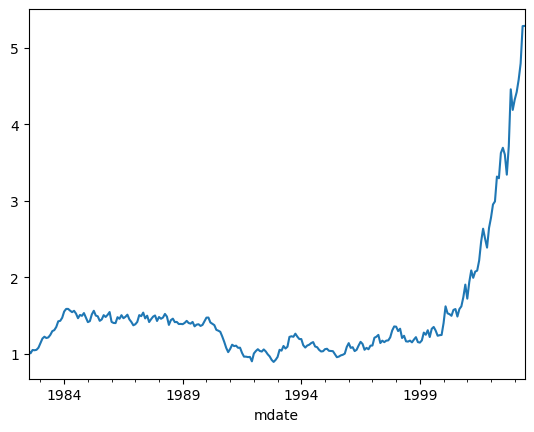

In [12]:
# Plot cummulative return of spread portfolio
(1 + vw_ret)['Spread'].cumprod().plot();

# Risk-adjusted performance

In [13]:
# Load data on Fama-French factors
ff3f = pdr.DataReader(name='F-F_Research_Data_Factors', data_source='famafrench', 
                      start='1972-01-01')[0]/100
#ff3f.index.rename('mdate', inplace = True)
ff3f

,Mkt-RF,SMB,HML,RF
Date,,,,
1972-01,0.0249,0.0585,0.0224,0.0029
1972-02,0.0287,0.0130,-0.0279,0.0025
1972-03,0.0063,-0.0024,-0.0161,0.0027
1972-04,0.0029,0.0011,0.0012,0.0029
1972-05,0.0125,-0.0269,-0.0270,0.0030
...,...,...,...,...
2022-10,0.0783,0.0009,0.0805,0.0023
2022-11,0.0460,-0.0340,0.0138,0.0029
2022-12,-0.0641,-0.0068,0.0132,0.0033


## Equal-weighted portfolios

In [14]:
# Merge EW monthly portfolio returns with the risk factors
alldata = ew_ret.join(ff3f)
alldata

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread,Mkt-RF,SMB,HML,RF
mdate,,,,,,,,,,,,,,,
1982-07,-0.003948,-0.011054,0.002117,-0.009741,-0.009275,-0.003169,-0.004816,-0.006250,-0.034018,-0.071587,0.067639,-0.0319,0.0083,0.0009,0.0105
1982-08,0.043106,0.058108,0.067768,0.071293,0.070272,0.076378,0.080404,0.078438,0.076014,0.069051,-0.025945,0.1114,-0.0414,0.0095,0.0076
1982-09,0.037267,0.034962,0.034323,0.037597,0.034146,0.047353,0.034485,0.030422,0.009593,-0.020953,0.058220,0.0129,0.0295,0.0028,0.0051
1982-10,0.154922,0.122708,0.106485,0.107380,0.119641,0.122316,0.112235,0.135088,0.142025,0.161400,-0.006478,0.1130,0.0234,-0.0366,0.0059
1982-11,0.116354,0.115989,0.096393,0.089470,0.069214,0.090190,0.091515,0.082948,0.097205,0.050597,0.065757,0.0467,0.0467,-0.0187,0.0063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-02,-0.019734,0.001625,-0.026126,-0.034833,-0.045058,-0.039061,-0.032196,-0.026197,-0.034444,-0.034851,0.015116,-0.0188,-0.0045,-0.0138,0.0009
2003-03,0.055259,0.031098,0.013882,0.006659,0.009049,0.012072,0.008408,0.014281,0.005784,0.009986,0.045273,0.0109,0.0103,-0.0191,0.0010
2003-04,0.148508,0.140660,0.123251,0.112512,0.095413,0.092639,0.085307,0.109632,0.085932,0.127671,0.020836,0.0822,0.0066,0.0117,0.0010


Cycle through all portfolios and regress excess returns on risk factors

In [15]:
# First, create empty tables to store portfolio alphas and their tstats
ew_portf_coeff = pd.DataFrame(np.nan, index = ['const', 'Mkt-RF','SMB', 'HML'], columns = ew_ret.columns)
ew_portf_coeff

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ew_portf_tstats = ew_portf_coeff.copy()
ew_portf_tstats

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Regressions for each portfolio
for p in ew_ret.columns:
    #Set up the data
        # Dependent variable is excess return on the portfolio
    y = alldata[p] - alldata['RF']
        # Except for the spread portfolio (which is alread an excess return)
    if p == 'Spread':
        y = alldata[p] 
        
        # Independent variables are the risk factors
    X = alldata[['Mkt-RF','SMB','HML']].copy()
    X['const'] = 1
    
    # Run the regression
    res = sm.OLS(y, X[['const','Mkt-RF','SMB','HML']], missing = 'drop').fit()
    # Adjust for autocorrelation in residuals
    res_robust = res.get_robustcov_results(cov_type = 'HAC', maxlags = 6)
    
    # Store the results
    ew_portf_coeff.loc[:,p] = res_robust.params 
    ew_portf_tstats.loc[:,p] = res_robust.tvalues 

print(res_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.715
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           6.01e-05
Time:                        07:21:58   Log-Likelihood:                 441.74
No. Observations:                 252   AIC:                            -875.5
Df Residuals:                     248   BIC:                            -861.4
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0214      0.004      6.008      0.0

Take a look at the results

In [19]:
print("\n Portfolio alphas and factor loadings:\n")
ew_portf_coeff


 Portfolio alphas and factor loadings:



portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,0.009559,0.006966,0.004510,0.002879,0.002097,0.002345,0.000996,-0.000359,-0.004288,-0.011835,0.021394
Mkt-RF,1.062260,0.961886,0.958992,0.891349,0.905635,0.927476,0.953022,1.034324,1.105890,1.236997,-0.174737
SMB,1.563695,1.179390,0.836426,0.688619,0.666368,0.702386,0.720628,0.828599,0.876110,0.957753,0.605943
HML,0.073249,0.223328,0.419966,0.353247,0.368794,0.289732,0.234368,0.185963,0.053055,-0.053822,0.127071


In [20]:
print("\n T-statistics:\n")
ew_portf_tstats


 T-statistics:



portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,2.619291,3.055189,3.110097,2.709521,2.296160,2.428906,1.200616,-0.338180,-2.958751,-5.159747,6.007953
Mkt-RF,11.486691,15.931878,22.489307,26.761871,40.593130,39.773473,43.670124,37.855299,30.527413,20.069321,-2.812017
SMB,8.961525,10.707320,7.599961,8.404802,9.502792,12.176715,8.882976,9.840857,6.720156,5.728980,3.473969
HML,0.318961,1.472370,4.116269,5.334134,6.354676,5.332194,4.049948,3.267815,0.562896,-0.352292,0.824591


## Value-weighted portfolios

In [21]:
# Merge VW monthly portfolio returns with the risk factors
alldata = vw_ret.join(ff3f)
alldata

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread,Mkt-RF,SMB,HML,RF
mdate,,,,,,,,,,,,,,,
1982-07,-0.016496,-0.032506,-0.008927,-0.020168,-0.008148,-0.014216,-0.016144,-0.026691,-0.052065,-0.063027,0.046531,-0.0319,0.0083,0.0009,0.0105
1982-08,0.112879,0.126619,0.133671,0.111961,0.122147,0.108101,0.125463,0.129065,0.111937,0.149069,-0.036190,0.1114,-0.0414,0.0095,0.0076
1982-09,0.035342,-0.011639,0.009310,0.021978,0.013155,0.008232,0.015515,0.021661,0.006081,-0.006955,0.042297,0.0129,0.0295,0.0028,0.0051
1982-10,0.180624,0.147793,0.118260,0.096087,0.082554,0.109715,0.099294,0.108276,0.163611,0.183572,-0.002948,0.1130,0.0234,-0.0366,0.0059
1982-11,0.075535,0.093501,0.050342,0.041856,0.039193,0.049904,0.040065,0.032300,0.074103,0.070121,0.005414,0.0467,0.0467,-0.0187,0.0063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-02,0.013984,-0.000944,-0.012868,-0.007327,-0.035330,-0.029244,-0.015190,-0.005070,-0.002535,-0.009106,0.023090,-0.0188,-0.0045,-0.0138,0.0009
2003-03,0.039739,0.007937,-0.010142,-0.014830,0.008708,0.016905,-0.013148,0.030607,0.045923,0.003247,0.036492,0.0109,0.0103,-0.0191,0.0010
2003-04,0.136213,0.078133,0.103938,0.091120,0.065227,0.060584,0.080776,0.078677,0.054610,0.089784,0.046430,0.0822,0.0066,0.0117,0.0010


Cycle through all portfolios and regress excess returns on risk factors

In [22]:
# First, create empty tables to store portfolio alphas and their tstats
vw_portf_coeff = pd.DataFrame(np.nan, index = ['const', 'Mkt-RF','SMB', 'HML'], columns = vw_ret.columns)
vw_portf_coeff

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
vw_portf_tstats = vw_portf_coeff.copy()
vw_portf_tstats

portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Regressions for each portfolio
for p in vw_ret.columns:
    #Set up the data
        # Dependent variable is excess return on the portfolio
    y = alldata[p] - alldata['RF']
        # Except for the spread portfolio (which is alread an excess return)
    if p == 'Spread':
        y = alldata[p] 
        
        # Independent variables are the risk factors
    X = alldata[['Mkt-RF','SMB','HML']].copy()
    X['const'] = 1
    
    # Run the regression
    res = sm.OLS(y, X[['const','Mkt-RF','SMB','HML']], missing='drop').fit()
    res_robust = res.get_robustcov_results(cov_type = 'HAC', maxlags = 6)
    
    # Store the results
    vw_portf_coeff.loc[:,p] = res_robust.params 
    vw_portf_tstats.loc[:,p] = res_robust.tvalues 

print(res_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     15.12
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           4.53e-09
Time:                        07:23:08   Log-Likelihood:                 452.67
No. Observations:                 252   AIC:                            -897.3
Df Residuals:                     248   BIC:                            -883.2
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.003      1.817      0.0

Take a look at the results

In [25]:
print("\n Portfolio alphas and factor loadings:\n")
vw_portf_coeff


 Portfolio alphas and factor loadings:



portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,0.000290,-0.000428,0.000185,0.001408,0.000363,0.000519,0.001905,0.002063,0.000197,-0.005083,0.005374
Mkt-RF,1.137942,1.079517,0.961564,0.883103,0.880913,0.950440,0.976145,1.006447,1.066098,1.216012,-0.078070
SMB,0.737353,0.169837,0.042593,-0.075015,-0.049715,-0.136981,-0.102068,0.076246,0.065937,0.262185,0.475168
HML,0.268259,0.307791,0.359662,0.250077,0.146542,0.170523,-0.041658,-0.341530,-0.553634,-0.392884,0.661143


In [26]:
print("\n T-statistics:\n")
vw_portf_tstats


 T-statistics:



portf_nr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Spread
const,0.138785,-0.247346,0.181093,1.489228,0.424545,0.551499,2.117366,1.610279,0.185540,-2.927644,1.816907
Mkt-RF,18.169942,24.861527,26.683369,26.409845,30.260815,28.649934,36.383952,31.229472,22.818687,26.260559,-0.974375
SMB,7.450553,1.837578,0.807182,-2.127936,-1.136439,-4.092208,-2.521685,1.509005,1.186412,3.443714,3.180851
HML,3.423134,2.726291,5.445035,4.055598,3.168255,1.787967,-0.805742,-7.028478,-7.056546,-5.343526,5.439341
